In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams.update({'font.size': 5})
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
file = 'standard.pt.pth'

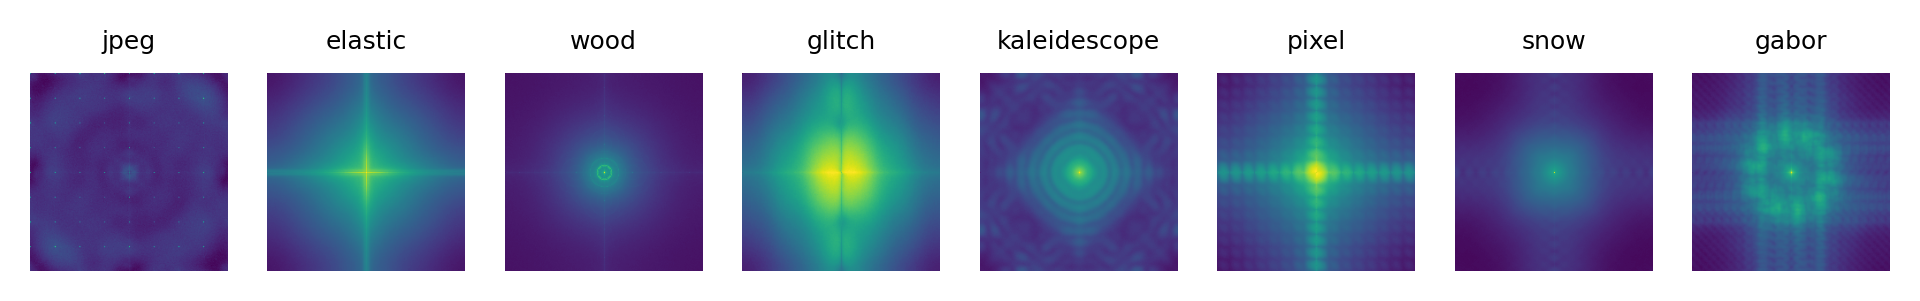

In [6]:
channel = 0
attacks = ['jpeg', 'elastic', 'wood', 'glitch', 'kaleidoscope', 'pixel', 'snow', 'gabor']
fig, axes = plt.subplots(ncols=len(attacks), figsize=(len(attacks), 2))
for attack, ax in zip(attacks, axes):
    deltas = torch.load(f'results/fourier_analysis/{attack}/{file}').numpy()
    fft_mean = []
    for i in range(deltas.shape[0]):
        perturb = deltas[i].transpose([1, 2, 0])[:, :, channel]
        fshift = np.fft.fftshift(np.fft.fft2(perturb))
        magnitude_spectrum = np.log(np.abs(fshift))
        fft_mean.append(magnitude_spectrum)
    fft_mean = np.stack(fft_mean).mean(0)
    ax.imshow(fft_mean)
    ax.set_title(attack)
    ax.set_axis_off()

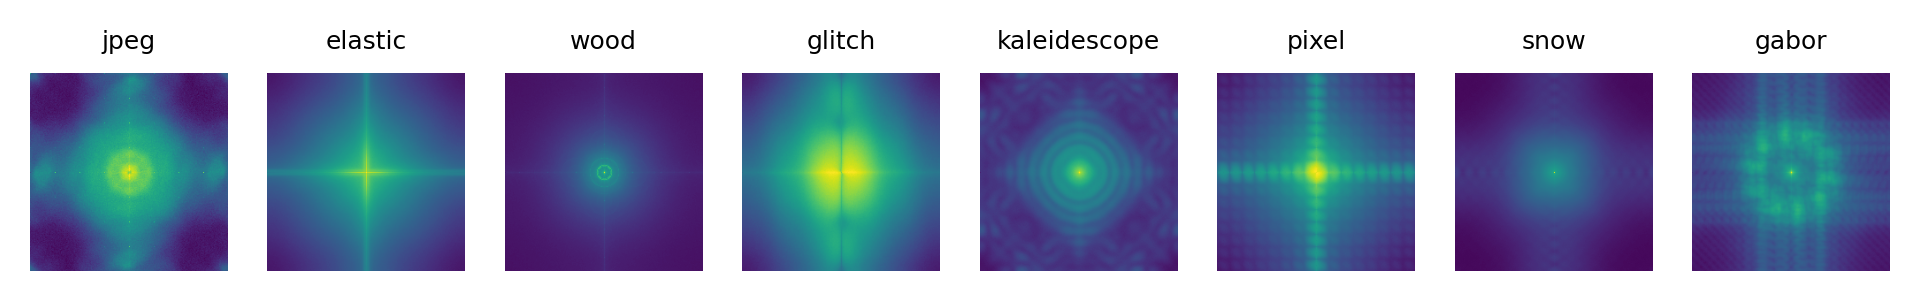

In [7]:
channel = 1
attacks = ['jpeg', 'elastic', 'wood', 'glitch', 'kaleidoscope', 'pixel', 'snow', 'gabor']
fig, axes = plt.subplots(ncols=len(attacks), figsize=(len(attacks), 2))
for attack, ax in zip(attacks, axes):
    deltas = torch.load(f'results/fourier_analysis/{attack}/{file}').numpy()
    fft_mean = []
    for i in range(deltas.shape[0]):
        perturb = deltas[i].transpose([1, 2, 0])[:, :, channel]
        fshift = np.fft.fftshift(np.fft.fft2(perturb))
        magnitude_spectrum = np.log(np.abs(fshift))
        fft_mean.append(magnitude_spectrum)
    fft_mean = np.stack(fft_mean).mean(0)
    ax.imshow(fft_mean)
    ax.set_title(attack)
    ax.set_axis_off()

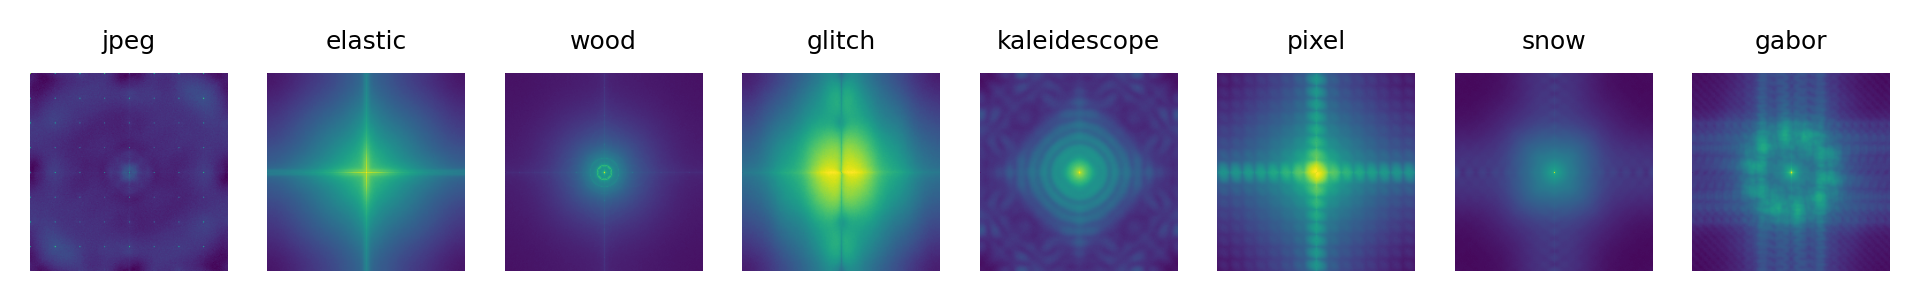

In [8]:
channel = 2
attacks = ['jpeg', 'elastic', 'wood', 'glitch', 'kaleidoscope', 'pixel', 'snow', 'gabor']
fig, axes = plt.subplots(ncols=len(attacks), figsize=(len(attacks), 2))
for attack, ax in zip(attacks, axes):
    deltas = torch.load(f'results/fourier_analysis/{attack}/{file}').numpy()
    fft_mean = []
    for i in range(deltas.shape[0]):
        perturb = deltas[i].transpose([1, 2, 0])[:, :, channel]
        fshift = np.fft.fftshift(np.fft.fft2(perturb))
        magnitude_spectrum = np.log(np.abs(fshift))
        fft_mean.append(magnitude_spectrum)
    fft_mean = np.stack(fft_mean).mean(0)
    ax.imshow(fft_mean)
    ax.set_title(attack)
    ax.set_axis_off()

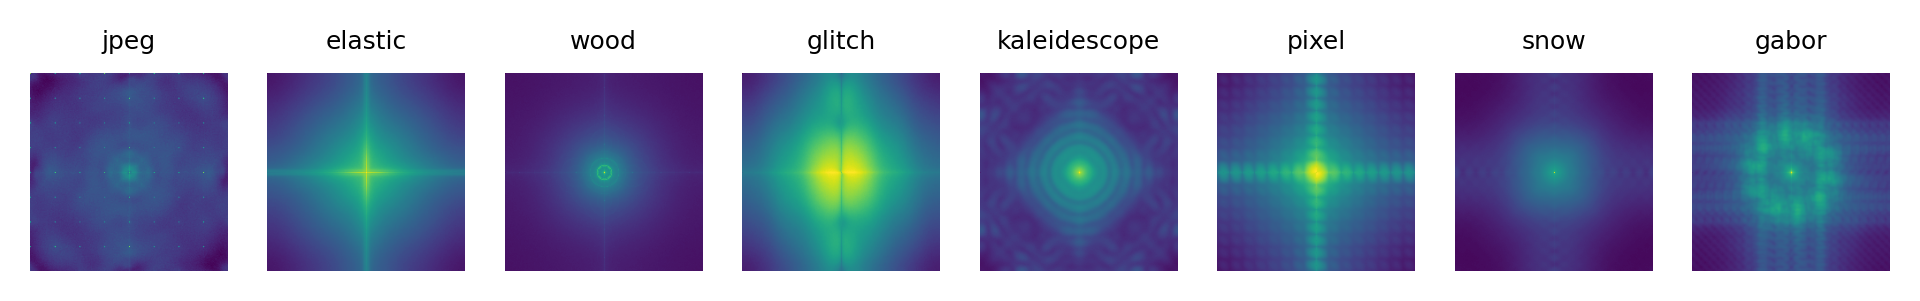

In [12]:
attacks = ['jpeg', 'elastic', 'wood', 'glitch', 'kaleidoscope', 'pixel', 'snow', 'gabor']
fig, axes = plt.subplots(ncols=len(attacks), figsize=(len(attacks), 2))
for attack, ax in zip(attacks, axes):
    deltas = torch.load(f'results/fourier_analysis/{attack}/{file}').numpy()
    channel_mean = []
    for channel in range(3):
        fft_mean = []
        for i in range(deltas.shape[0]):
            delta = deltas[i].transpose([1, 2, 0])[:, :, channel]
            fshift = np.fft.fftshift(np.fft.fft2(delta))
            magnitude_spectrum = np.log(np.abs(fshift))
            fft_mean.append(magnitude_spectrum)
        fft_mean = np.stack(fft_mean).mean(0)
        channel_mean.append(fft_mean)
    channel_mean = np.stack(channel_mean).mean(0)
    ax.imshow(channel_mean)
    ax.set_title(attack)
    ax.set_axis_off()
# plt.suptitle(file)
plt.savefig('fourier.pdf', bbox_inches="tight", pad_inches = 0)